# MSDS 430 Milestone 1

#### Complete the following step by step instructions and submit your notebook and data file to Canvas. Your completed notebook should include all output, i.e. run each cell and save your file before submitting.

<font color=green> In this first milestone we will begin working toward the final project for this course. You should begin by finding a data set that contains data you find interesting. You can find some inspiration and data sets on Kaggle.com or through the university library. Keep in mind that you cannot duplicate what's been done on Kaggle (or anywhere else) for your own project, but you can choose your data set from there or at least get ideas. You will need to also import numpy, matplotlib, and pandas at the very least for this assignment. Feel free to import any other libraries you find necessary.  </font>

Step 1 (5 pts.): Explain your plans for the final project.

### Goals of final project: Use machine learning to determine which physiochemical properties make a wine 'good'

- Load red wine data into dataframe and begin assessing data profile, focusing on the following characteristics
    - Data types are consistent with expectation
    - Tuples are all populated - no NA values. In the event of NA values, decide on keeping, modifying, or removing
    - Create new values using existing for the purpose of further grouping, filtering, or slicing
- Identify summary statistics and begin to form hypotheses for relationship between variables
    - Are value ranges as anticipated?
    - Do outliers exist which may skew results?
- Using Numpy, attempt multiple regression methodologies using quality as dependent variable and all others as independent to quantify relationships
- Plot interesting relationships using Matplotlib to determine if visual depiction aligns with results from Numpy




Step 2 (5 pts.): Read in your data file and use pandas to inspect the first 5 lines and the last 5 lines.

In [31]:
# Import the necessary libraries
import pandas as pd
from pandas import *
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns
import statsmodels.api as sm
import sklearn 

In [32]:
filename = 'winequality-red.csv'     #Assign filename to file to be used for analisys

df = pd.read_csv(filename)           #Read csv info datagram df

df.head(5)                           #Return the first 5 tuples in the dataframe



,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [33]:
df.tail(5)   # Return the last 5 tuples in the dataframe

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Step 3 (5 pts.): Use numpy to perform a few calculations relevant to your goals for the final project. Explain each calculation by including comments within your code.

In [34]:
#Correlations between each attribute and quality
correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed_acidity           0.124052
volatile_acidity       -0.390558
citric_acid             0.226373
residual_sugar          0.013732
chlorides              -0.128907
free_sulfur_dioxide    -0.050656
total_sulfur_dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


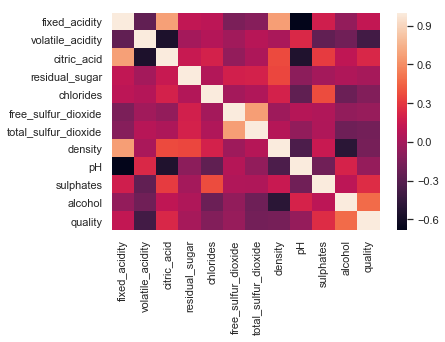

In [35]:
#Heatmap of correlation 
sns.heatmap(df.corr())
plt.show()

In [36]:
y = df.quality                  # set 'quality' as target
X = df.drop('quality', axis=1)  # rest are features
print(y.shape, X.shape) 

(1599,) (1599, 11)


Step 4 (5 pts.): Use matplotlib to create a visual display relevant to your goals for the final project. Explain your graph by including comments within your code.

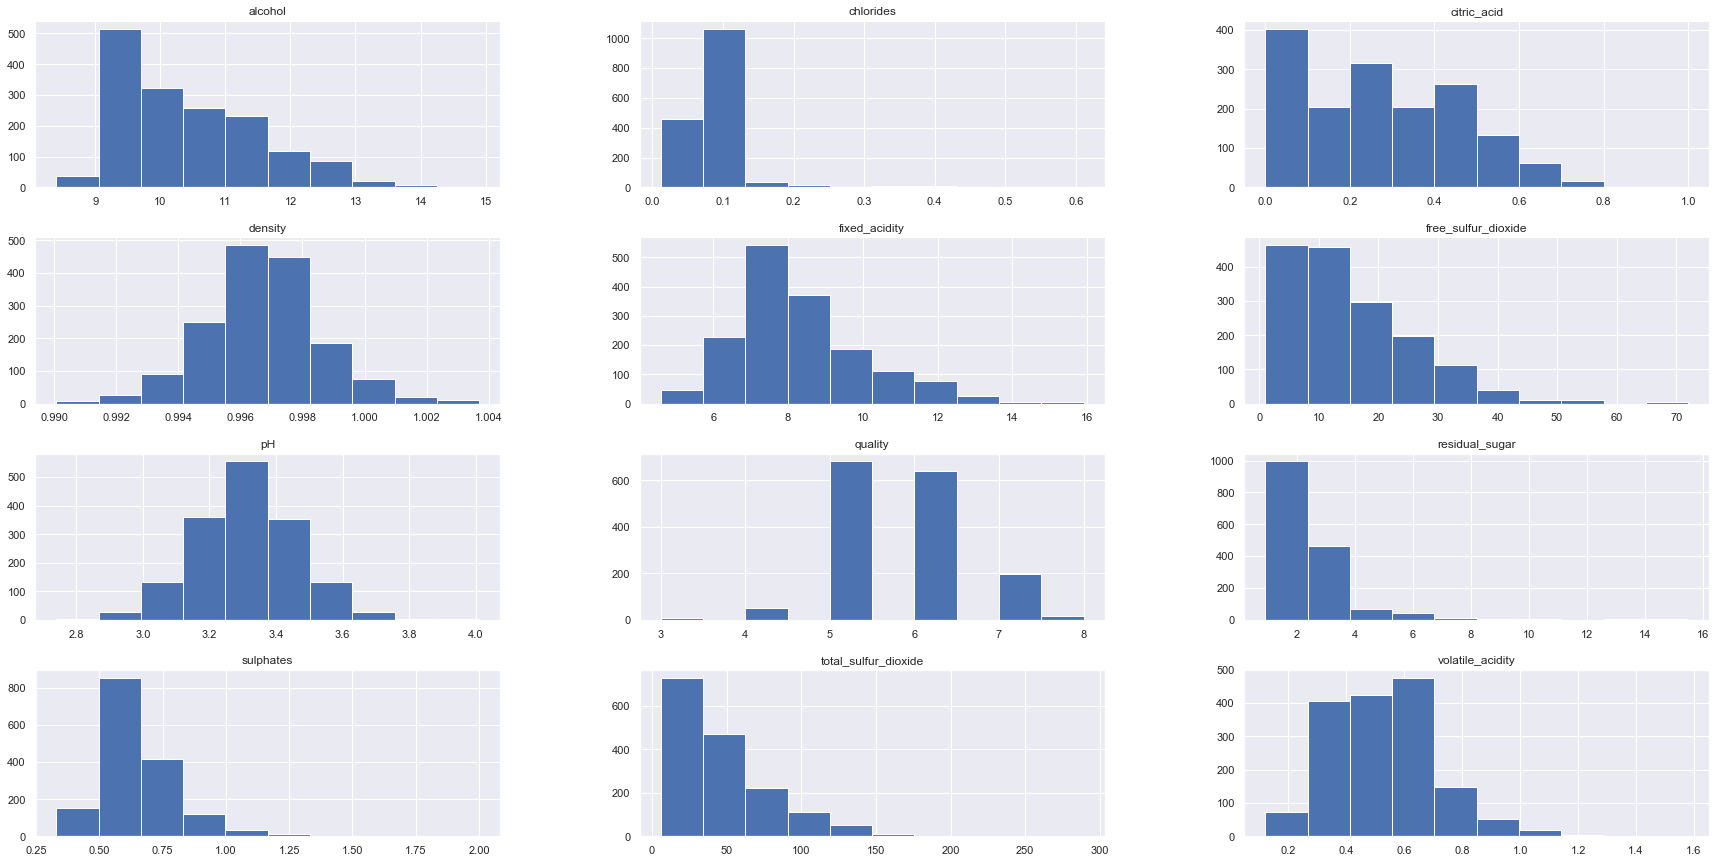

In [40]:
params = {'axes.titlesize':'50',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
matplotlib.rcParams.update(params)

sns.set()
df.hist(figsize=(30,15))
plt.show()

Text(0.5, 1.0, 'Alcohol')

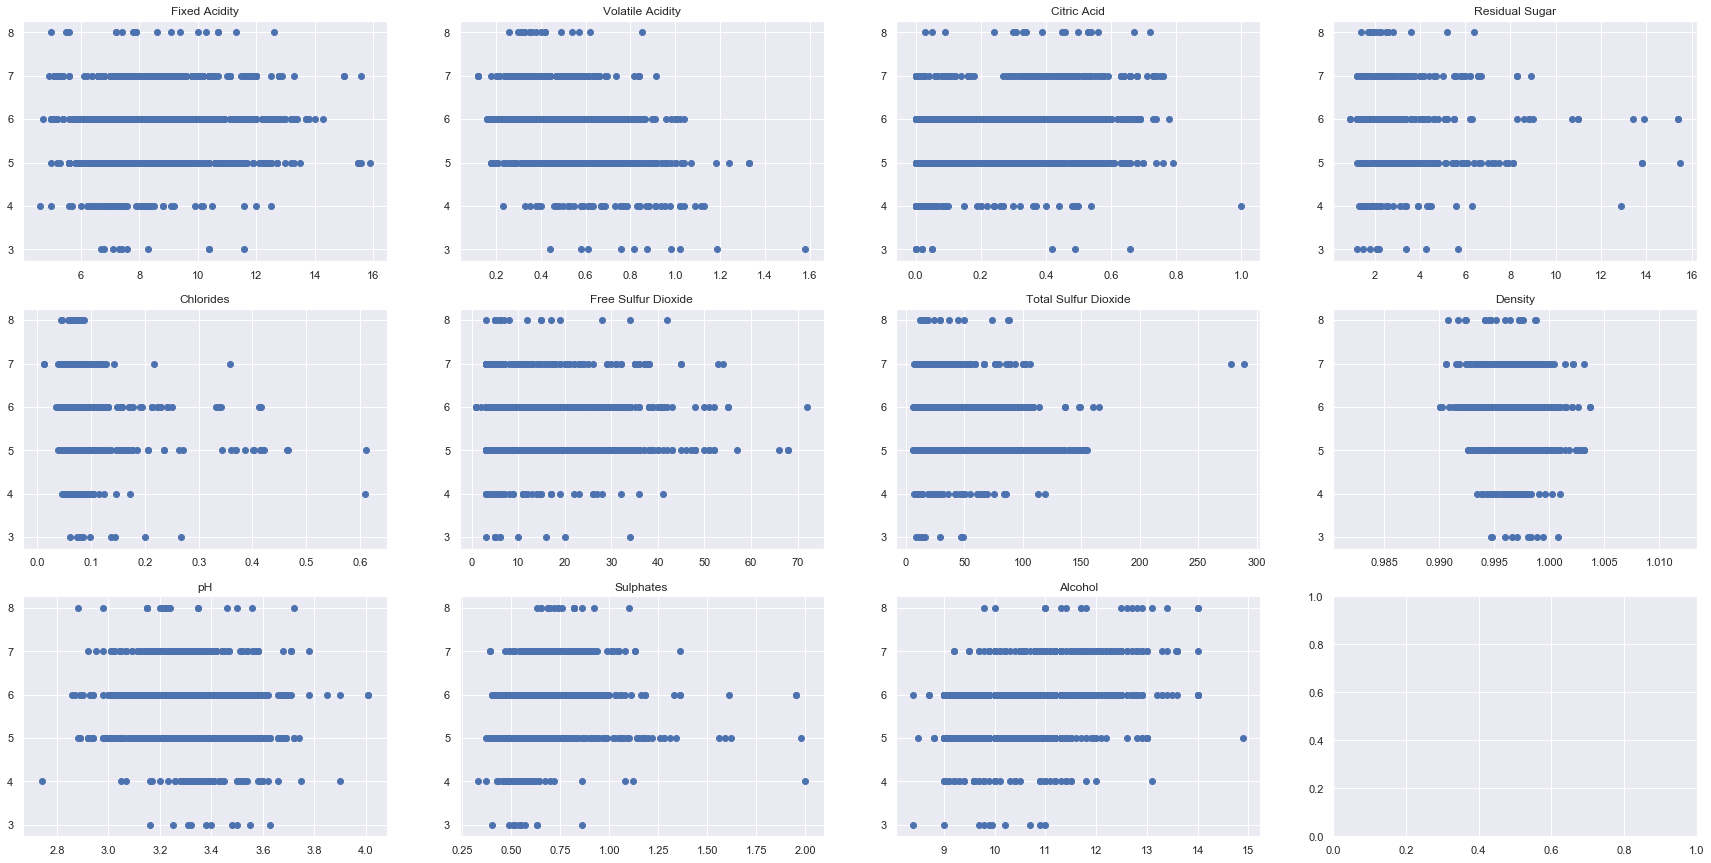

In [38]:
fig, axs2 = plt.subplots(3, 4, figsize=(30,15))
axs2[0,0].scatter(df.fixed_acidity, df.quality)
axs2[0,0].set_title('Fixed Acidity')
axs2[0,1].scatter(df.volatile_acidity, df.quality)
axs2[0,1].set_title('Volatile Acidity')
axs2[0,2].scatter(df.citric_acid, df.quality)
axs2[0,2].set_title('Citric Acid')
axs2[0,3].scatter(df.residual_sugar, df.quality)
axs2[0,3].set_title('Residual Sugar')
axs2[1,0].scatter(df.chlorides, df.quality)
axs2[1,0].set_title('Chlorides')
axs2[1,1].scatter(df.free_sulfur_dioxide, df.quality)
axs2[1,1].set_title('Free Sulfur Dioxide')
axs2[1,2].scatter(df.total_sulfur_dioxide, df.quality)
axs2[1,2].set_title('Total Sulfur Dioxide')
axs2[1,3].scatter(df.density, df.quality)
axs2[1,3].set_title('Density')
axs2[2,0].scatter(df.pH, df.quality)
axs2[2,0].set_title('pH')
axs2[2,1].scatter(df.sulphates, df.quality)
axs2[2,1].set_title('Sulphates')
axs2[2,2].scatter(df.alcohol, df.quality)
axs2[2,2].set_title('Alcohol')
